In [27]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor as dtr
from sklearn import tree
from sklearn.model_selection import GridSearchCV, train_test_split

In [28]:
df = pd.read_csv("Hitters.csv")

In [29]:
df.describe()
df1 = df.drop(["League","NewLeague","Errors","AtBat","Unnamed: 0","HmRun","CAtBat","CHits","Division","CRuns","CHmRun","CRBI","CWalks"],axis=1)

In [30]:
df1["Salary"].fillna(df["Salary"].mean(), inplace=True)

In [31]:
df1

,Hits,Runs,RBI,Walks,Years,PutOuts,Assists,Salary
0,66,30,29,14,1,446,33,535.925882
1,81,24,38,39,14,632,43,475.000000
2,130,66,72,76,3,880,82,480.000000
3,141,65,78,37,11,200,11,500.000000
4,87,39,42,30,2,805,40,91.500000
5,169,74,51,35,11,282,421,750.000000
6,37,23,8,21,2,76,127,70.000000
7,73,24,24,7,3,121,283,100.000000
8,81,26,32,8,2,143,290,75.000000
9,92,49,66,65,13,0,0,1100.000000


In [26]:
df1["Salary"] = df1["Salary"].apply(np.log) 
y = df1["Salary"]
df1 = df1.drop("Salary",axis=1)
y

KeyError: 'Salary'

In [15]:
x_train,x_test,y_train,y_test = train_test_split(df1,y,test_size = 0.2)

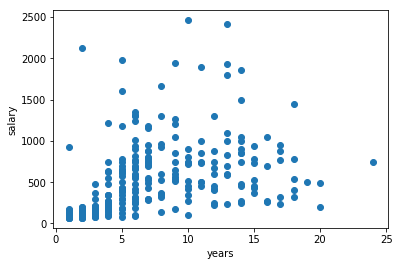

In [16]:
plt.scatter(years,salary)
plt.xlabel("years")
plt.ylabel("salary")
plt.show()

In [17]:
regressor = dtr(random_state=0)

In [24]:
y_pred = regressor.fit(x_train,y_train)
y_pred

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best')

In [19]:
tree.export_graphviz(regressor,out_file='hitter_tree1.dot') 

In [20]:

predictions = y_pred.predict(x_test)
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, predictions))
print("RMSE for training data:", rmse)


RMSE for training data: 0.8034374091309225


In [21]:
parameters = {
     'max_features':(None, 4, 6,7), # numbers of features per tree to try
     'max_depth':(None, 8, 16),
     'min_samples_split': (2, 4, 8),
     'min_samples_leaf': (16, 4, 12)
}


In [22]:
clf = GridSearchCV(regressor, parameters, cv=5, n_jobs=4)
clf.fit(x_train, y_train)
clf.best_score_, clf.score(x_test, y_test), clf.best_params_

(0.38879270523472026,
 0.46927917458238544,
 {'max_depth': None,
  'max_features': None,
  'min_samples_leaf': 12,
  'min_samples_split': 2})